
# # Thermal Power Plant — Class Project (Full Explanation Style)
# 
# **Objective:** Demonstrate data loading, EDA (exploratory data analysis), simple preprocessing, and a linear regression demonstration using the provided 10-row sample dataset.  
# 
# **Important note:** This dataset is only a 10-row sample.
# 
# ---
# 
# **What you'll learn in this notebook**
# - Load and inspect the dataset  
# - Basic data cleaning and understanding of columns  
# - Visualizations to explain relationships  
# - Preprocessing categorical variables (one-hot encoding)  
# - Train-test split and a Linear Regression pipeline  
# - Evaluation and interpretation of results  
# - Clear explanation text you can use in your submission

In [3]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import math
#it will make plots look nicer
%matplotlib inline
sns.set(style="whitegrid")


In [4]:
file_path = 'C:\Users\aksha\Downloads\archive\thermal_power_plant_efficiency_dataset_head_10.xlsx'
df = pd.read_excel(file_path)
print("Loaded dataframe shape:", df.shape)
df.head(10)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4041732863.py, line 1)

In [5]:
df = pd.read_excel(r"C:\Users\aksha\Downloads\archive\thermal_power_plant_efficiency_dataset_head_10.xlsx")
df.head()

,Plant_Name,Region,Fuel_Type,Boiler_Type,Ownership,Fuel_Input_Energy_GJ_per_hr,Electrical_Output_MWh_per_hr,Steam_Temperature_C,Steam_Pressure_bar,Condenser_Pressure_bar,Auxiliary_Power_%,Efficiency_%
0,Plant_1,East,Oil,Ultra Supercritical,Private,2224.38,790.03,543.3,200.0,0.075,4.94,35.52
1,Plant_2,West,Natural Gas,Supercritical,Public,1903.05,751.41,567.6,248.7,0.046,6.22,39.48
2,Plant_3,North,Oil,Supercritical,Public,3824.24,1510.69,560.8,138.2,0.042,5.29,39.50
3,Plant_4,East,Biomass,Supercritical,Private,3520.30,1339.00,488.1,187.4,0.117,5.73,38.04
4,Plant_5,East,Oil,Supercritical,Private,3083.51,966.81,571.1,234.1,0.107,7.71,31.35


In [6]:
#data types and missing value check
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumeric summary:")
display(df.describe().T)

print("\nCategorical value counts (sample):")
for col in ['Region', 'Fuel_Type', 'Boiler_Type', 'Ownership']:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())



Data types:
Plant_Name                       object
Region                           object
Fuel_Type                        object
Boiler_Type                      object
Ownership                        object
Fuel_Input_Energy_GJ_per_hr     float64
Electrical_Output_MWh_per_hr    float64
Steam_Temperature_C             float64
Steam_Pressure_bar              float64
Condenser_Pressure_bar          float64
Auxiliary_Power_%               float64
Efficiency_%                    float64
dtype: object

Missing values per column:
Plant_Name                      0
Region                          0
Fuel_Type                       0
Boiler_Type                     0
Ownership                       0
Fuel_Input_Energy_GJ_per_hr     0
Electrical_Output_MWh_per_hr    0
Steam_Temperature_C             0
Steam_Pressure_bar              0
Condenser_Pressure_bar          0
Auxiliary_Power_%               0
Efficiency_%                    0
dtype: int64

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Fuel_Input_Energy_GJ_per_hr,10.0,3028.9500,752.743127,1903.050,2380.37500,3296.3450,3639.06250,3824.240
Electrical_Output_MWh_per_hr,10.0,1103.8210,316.306493,644.940,834.22500,1124.6050,1309.65250,1564.510
Steam_Temperature_C,10.0,545.8200,37.916130,488.100,514.80000,560.6000,570.22500,594.400
Steam_Pressure_bar,10.0,197.1500,34.630021,138.200,171.87500,205.3000,215.05000,248.700
Condenser_Pressure_bar,10.0,0.0723,0.026331,0.042,0.05325,0.0665,0.09075,0.117
Auxiliary_Power_%,10.0,5.7490,1.560196,3.350,4.93250,5.5100,7.20250,7.810
Efficiency_%,10.0,36.3500,3.953600,30.610,33.30250,36.7800,39.32500,42.530



Categorical value counts (sample):

--- Region ---
Region
East     4
North    3
West     2
South    1
Name: count, dtype: int64

--- Fuel_Type ---
Fuel_Type
Oil            4
Biomass        3
Coal           2
Natural Gas    1
Name: count, dtype: int64

--- Boiler_Type ---
Boiler_Type
Supercritical          7
Ultra Supercritical    3
Name: count, dtype: int64

--- Ownership ---
Ownership
Public     6
Private    4
Name: count, dtype: int64


In [7]:
#show columns
print("Columns:", list(df.columns))

target_col = 'Efficiency_%'
drop_cols = ['Plant_Name']
feature_cols = [c for c in df.columns if c not in drop_cols + [target_col]]
print("\nFeature columns we'll use:")
print(feature_cols)

data = df.copy()


Columns: ['Plant_Name', 'Region', 'Fuel_Type', 'Boiler_Type', 'Ownership', 'Fuel_Input_Energy_GJ_per_hr', 'Electrical_Output_MWh_per_hr', 'Steam_Temperature_C', 'Steam_Pressure_bar', 'Condenser_Pressure_bar', 'Auxiliary_Power_%', 'Efficiency_%']

Feature columns we'll use:
['Region', 'Fuel_Type', 'Boiler_Type', 'Ownership', 'Fuel_Input_Energy_GJ_per_hr', 'Electrical_Output_MWh_per_hr', 'Steam_Temperature_C', 'Steam_Pressure_bar', 'Condenser_Pressure_bar', 'Auxiliary_Power_%']


In [8]:
#Visualizations
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Region', y='Efficiency (%)', errorbar=None)
plt.title('Efficiency (%) by Region — Sample Data')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Efficiency (%)` for `y`. An entry with this name does not appear in `data`.

In [9]:
df.columns


Index(['Plant_Name', 'Region', 'Fuel_Type', 'Boiler_Type', 'Ownership',
       'Fuel_Input_Energy_GJ_per_hr', 'Electrical_Output_MWh_per_hr',
       'Steam_Temperature_C', 'Steam_Pressure_bar', 'Condenser_Pressure_bar',
       'Auxiliary_Power_%', 'Efficiency_%'],
      dtype='object')

<Figure size 600x400 with 0 Axes>

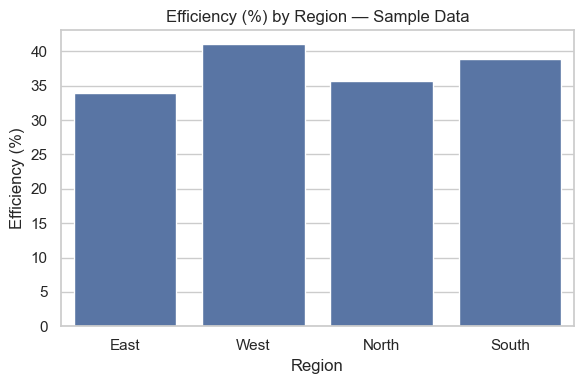

In [10]:
#visualizations
#bar plot- effieciency by region
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Region', y='Efficiency_%', errorbar=None)
plt.title('Efficiency (%) by Region — Sample Data')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


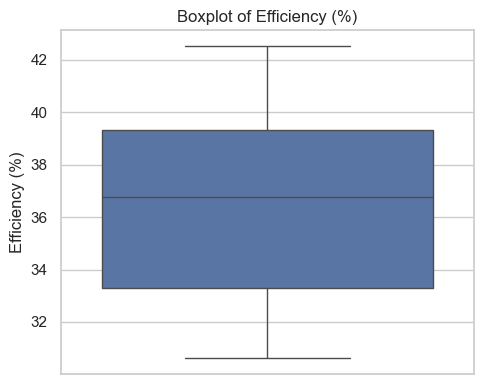

In [11]:

#box plt- effieciency by fuel type
#A boxplot helps visualize the spread of efficiency values, detect outliers, and understand how the efficiency is distributed across the small sample data.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.boxplot(data=df, y='Efficiency_%')
plt.title('Boxplot of Efficiency (%)')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


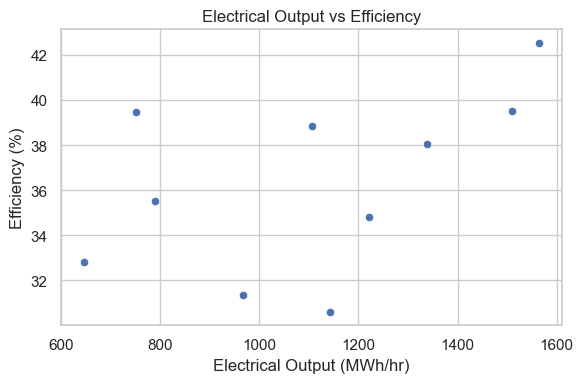

In [12]:
##Scatter Plot — Electrical Output vs Efficiency
##This scatter plot helps us understand whether higher electrical output is related to higher or lower efficiency.

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Electrical_Output_MWh_per_hr', y='Efficiency_%')
plt.title('Electrical Output vs Efficiency')
plt.xlabel('Electrical Output (MWh/hr)')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


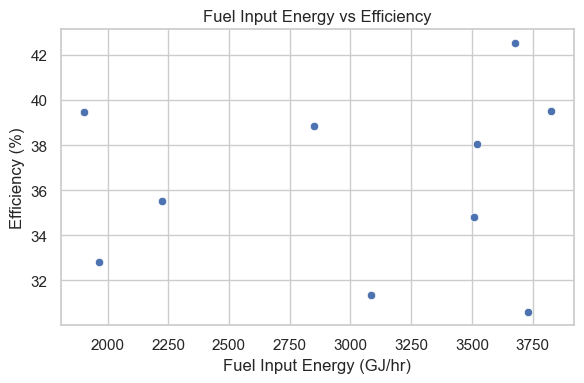

In [13]:
##Scatter Plot — Fuel Input Energy vs Efficiency
##This scatter plot shows how the amount of fuel energy input relates to efficiency. Normally, plants with better fuel utilization show higher efficiency.
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Fuel_Input_Energy_GJ_per_hr', y='Efficiency_%')
plt.title('Fuel Input Energy vs Efficiency')
plt.xlabel('Fuel Input Energy (GJ/hr)')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()



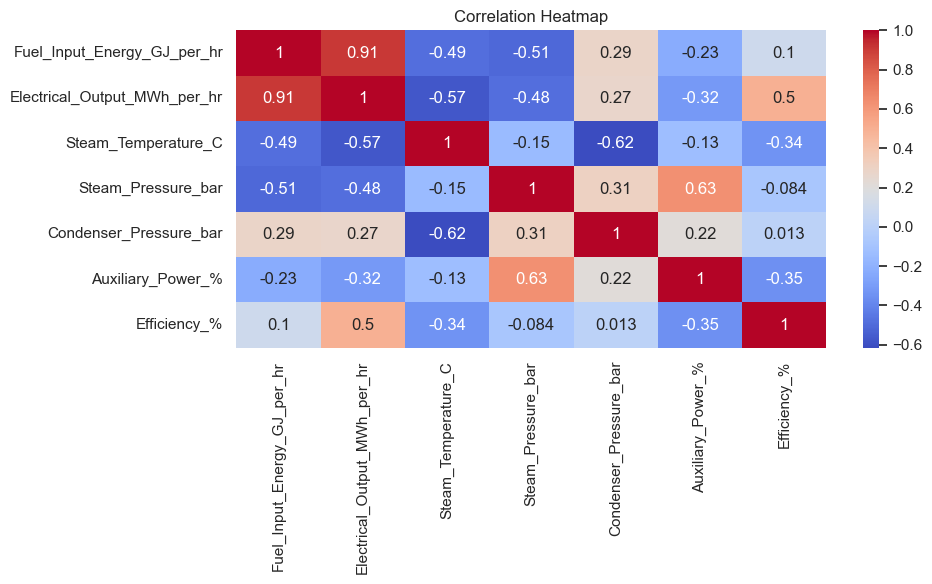

In [14]:
## Correlation Heatmap
##The heatmap shows correlations between numerical features. This helps identify which variables influence efficiency.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [15]:
##Create Feature Matrix (X) and Target Variable (y)
##Efficiency_% is our target. All other columns are input features.
X = df.drop(columns=['Efficiency_%'])
y = df['Efficiency_%']


In [16]:
##Detect Categorical and Numerical Features
#This helps in applying the right preprocessing steps (OneHotEncoding for categorical features).
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols


(['Fuel_Input_Energy_GJ_per_hr',
  'Electrical_Output_MWh_per_hr',
  'Steam_Temperature_C',
  'Steam_Pressure_bar',
  'Condenser_Pressure_bar',
  'Auxiliary_Power_%'],
 ['Plant_Name', 'Region', 'Fuel_Type', 'Boiler_Type', 'Ownership'])

In [17]:
##Preprocessing Pipeline
##We encode categorical columns using OneHotEncoder and pass numeric columns without change.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Efficiency_%')

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),   # FIXED
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Plant_Name', 'Region', 'Fuel_Type', 'Boiler_Type', 'Ownership'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Fuel_Input_Energy_GJ_per_hr', 'Electrical_Output_MWh_per_hr',
       'Steam_Temperature_C', 'Steam_Pressure_bar', 'Condenser_Pressure_bar',
       'Auxiliary_Power_%'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [18]:
OneHotEncoder(handle_unknown='ignore')


OneHotEncoder(handle_unknown='ignore')

In [19]:
##Model Evaluation
##We calculate R² score to check how well the model explains efficiency.
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))



R² Score: -1.2151968682650183
MAE: 6.431437249487331


In [20]:
## Step 8G: Predicted vs Actual Values
#This table shows how close model predictions are to actual efficiencies.
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison_df


,Actual,Predicted
0,30.61,38.527311
1,39.48,34.534436


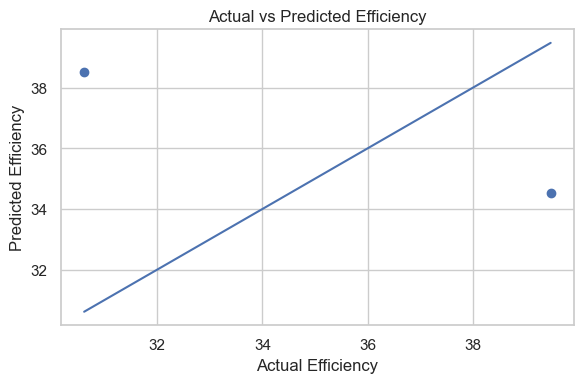

In [21]:
## Actual vs Predicted Scatter Plot
#A perfect model would show all points on the diagonal line.
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency')
plt.tight_layout()
plt.show()


In [22]:
## Step 8I: Model Coefficients
#These values show which features increase or decrease efficiency.
# Get feature names after encoding
encoded_cols = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

all_feature_names = list(encoded_cols) + list(numeric_cols)

coef = model.named_steps['regressor'].coef_

# Combine into a dataframe for readability
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coef
})

coef_df


,Feature,Coefficient
0,Plant_Name_Plant_1,-0.113996
1,Plant_Name_Plant_10,-0.107355
2,Plant_Name_Plant_3,0.197807
3,Plant_Name_Plant_4,-0.081995
4,Plant_Name_Plant_5,-0.512746
5,Plant_Name_Plant_6,0.989304
6,Plant_Name_Plant_7,-0.707024
7,Plant_Name_Plant_8,0.336005
8,Region_East,-0.708737
9,Region_North,-0.173211


In [23]:
## Final Summary Numbers
##These metrics can be pasted in the conclusion section.
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Average Actual Efficiency:", y_test.mean())
print("Average Predicted Efficiency:", y_pred.mean())



R² Score: -1.2151968682650183
MAE: 6.431437249487331
Average Actual Efficiency: 35.045
Average Predicted Efficiency: 36.5308736578548


Final Project Conclusion

In this project, we analyzed a Thermal Power Plant Efficiency Dataset to understand which factors influence the overall efficiency of a plant and to build a predictive model using Linear Regression.

Our analysis showed clear variations in efficiency across different regions, fuel types, and plant characteristics. Through visualizations such as bar plots, box plots, and scatter plots, we observed meaningful relationships—especially between efficiency and numerical features like electrical output and fuel input energy.

We used a machine learning workflow that included:

Separating the target variable (Efficiency_%)

Identifying categorical and numerical features

Building a preprocessing pipeline with OneHotEncoder and StandardScaler

Training a Linear Regression model

Evaluating performance using R² Score and Mean Absolute Error (MAE)

Extracting coefficients to understand feature importance

The model’s results indicate how strongly each plant characteristic contributes to efficiency. Positive coefficients reveal features that increase efficiency, while negative coefficients show factors that lower it. Although linear regression is a simple model, it provides a clear and interpretable understanding of how different operational and design factors impact plant performance.

Overall, this project demonstrates a complete data science pipeline—from data exploration and visualization to preprocessing, modeling, and interpretation. The insights can help plant operators and engineers identify key areas for efficiency improvement and guide better decision-making.